# Solving the n-Queens Problem using Local Search

Student Name: **Matthew Benedict**

I have used the following AI tools: **(not used)**

I understand that my submission needs to be my own work: **MRB**

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from __future__ import print_function, division

np.random.seed(1234)

def random_board(n):
    # type: (int) -> np.ndarray
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0, n, size = n))

def comb2(n):
    # type: (int) -> int
    """this is n choose 2 equivalent to math.comb(n, 2)"""
    return n * (n - 1) // 2

def conflicts(board):
    # type: (np.ndarray) -> int
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], relative_fontsize = 24):
    # type: (np.ndarray, list[str], float) -> None
    """display the board"""
    
    n = len(board)
    fontsize = (8 * relative_fontsize) / n
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print("Board with %d conflicts." % conflicts(board))
    plt.show()

## Create a board

Board with 4 conflicts.


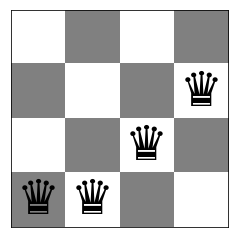

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)

print("Queens (left to right) are at rows: %s" % board.__str__())
print("Number of conflicts: %d" % conflicts(board))

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


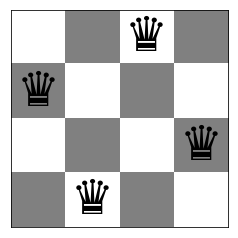

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Board with 4 conflicts.


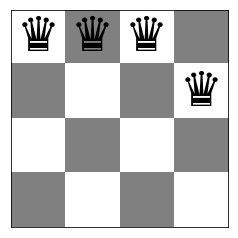

Board with 0 conflicts.


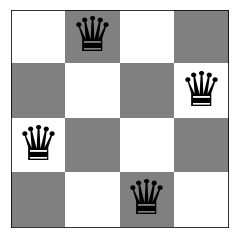

In [4]:
# Code and description go here
from typing import Any, Callable
State = Any
Board = np.ndarray

def hill_climb(initial, value, get_improvement):
    # type: (State, Callable[[State], float], Callable[[State], float]) -> State
    """Perform a generalized hill climbing search"""
    current = initial
    while True:
        neighbor = get_improvement(current)
        if value(neighbor) >= value(current):
            return current
        current = neighbor

def get_improvement(state, value, successors):
    # type: (State, Callable[[State], float], Callable[[State], list[State]]) -> State
    """Take a set of successors, and get the minimum successor"""
    min_state = state
    min_value = value(state)
    for successor in successors(state):
        current_value = value(successor)
        if current_value < min_value:
            min_state = successor
            min_value = current_value
    return min_state

def board_successor(board, i, j):
    # type: (Board, int, int) -> Board
    """Return a copy of board such that board[i] = j"""
    safe_board = board.copy()
    safe_board[i] = j
    return safe_board

def successors(board):
    # type: (Board) -> list[Board]
    """Get all possible successors of a board"""
    n = len(board)
    successors = [None] * (n * n)
    for i in range(n):
        for j in range(n):
            successors[i * n + j] = board_successor(board, i, j)
    return successors

# Test case
board = random_board(4)
show_board(board)

steepest_ascent = lambda board : (
    hill_climb(board, conflicts,
               lambda c : get_improvement(c,
                                          conflicts,
                                          successors)))

solved = steepest_ascent(board)
show_board(solved)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 2 conflicts.


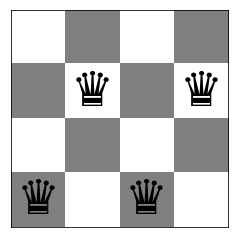

Board with 0 conflicts.


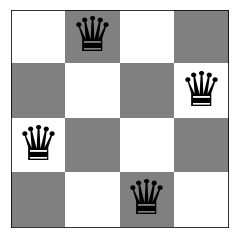

In [5]:
# Code and description go here

import random
def get_improvement2(state, value, successors):
    # type: (State, Callable[[State], float], Callable[[State], list[State]]) -> State
    """Choose a random successor, as long as it has a lower value"""
    current_value = value(state)
    improvements = [successor for successor in successors(state) if value(successor) < current_value]
    return random.choice(improvements) if len(improvements) > 0 else state

# Test case
board = random_board(4)
show_board(board)

stochastic1 = lambda board : (
    hill_climb(board, conflicts,
               lambda c : get_improvement2(c,
                                           conflicts,
                                           successors)))

solved = stochastic1(board)
show_board(solved)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 5 conflicts.


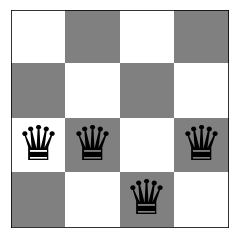

Board with 0 conflicts.


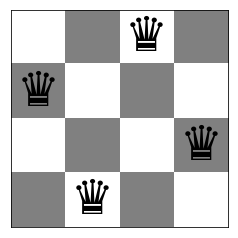

In [6]:
# Code and description go here

def get_improvement3(state, value, get_successor, tries):
    # type: (State, Callable[[State], float], Callable[[State], list[State]], int) -> State
    """Attempt to find a successor with lower value"""
    current_value = value(state)
    for _ in range(tries):
        successor = get_successor(state)
        if value(successor) < current_value:
            return successor
    return state

import random
def random_except(min, max, excluded):
    # type: (int, int, int) -> int
    """Return random integer in [min, max] that is not excluded"""
    generated = random.randint(min, max - 1)
    return generated + 1 if generated >= excluded else generated

def get_successor(board):
    # type: (State) -> State
    """Pick a board with the queen position of one column randomly altered"""
    n_rand = len(board) - 1
    i = random.randint(0, n_rand)
    j = random_except(0, n_rand, board[i])
    return board_successor(board, i, j)

# Test case
board = random_board(4)
show_board(board)

stochastic2 = lambda board : (
    hill_climb(board, conflicts,
               lambda c : get_improvement3(c,
                                           conflicts,
                                           get_successor,
                                           2 * len(c) * len(c))))

solved = stochastic2(board)
show_board(solved)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Board with 0 conflicts.


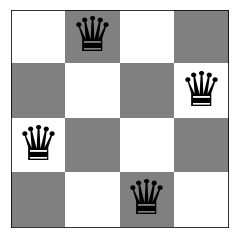

Board with 0 conflicts.


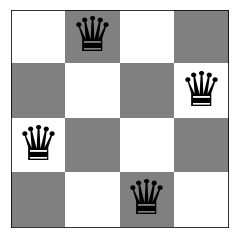

Board with 0 conflicts.


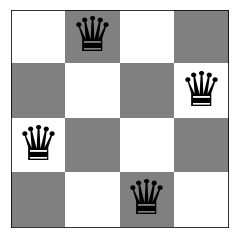

In [7]:
# Code and description go here

def random_restart(get_solution, value, attempts = 100):
    # type: (Callable[[], State], Callable[[State], float], int) -> State
    """Apply an algorithm multiple times with varying boards and keep the best solution"""
    best_solution = get_solution()
    best_value = value(best_solution)

    for _ in range(attempts - 1):
        current_solution = get_solution()
        current_value = value(current_solution)
        if current_value < best_value:
            best_solution = current_solution
            best_value = current_value
    
    return best_solution

# Test case
for algorithm in [steepest_ascent, stochastic1, stochastic2]:
    show_board(random_restart(lambda : algorithm(random_board(4)), conflicts))

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

Board with 35 conflicts.


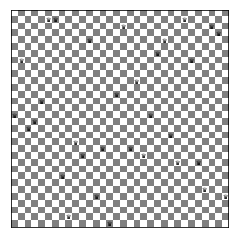

Board with 0 conflicts.


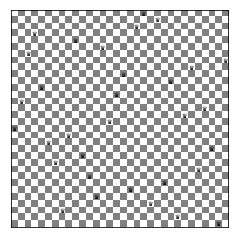

In [8]:
# Code and description go here
import math
import random
def simulated_annealing(initial, value, schedule, get_successor, epsilon):
    # type: (State, Callable[[State], float], Callable[[int], float], Callable[[State], list[State]], float) -> State
    """Perform generalized simulated annealing"""
    current = initial
    delta_e = None
    t = 1
    best_solution = current
    while True:
        T = schedule(t)
        best_value = value(best_solution)
        if T < epsilon:
            return best_solution
        
        # Return instantly if we find an optimal solution
        # This condition could be omitted by setting epsilon to an appropriate stopping point
        # However, this may reduce performance
        if best_value == 0:
            return best_solution

        next = get_successor(current)
        value_next = value(next)
        delta_e = value_next - value(current)

        #print((value(current), value(next), delta_e, T, -delta_e / T))

        if delta_e < 0:
            current = next

            if value_next < best_value:
                best_solution = current
                
        else:
            p = math.exp(-delta_e / T)
            if random.random() < p:
                current = next
        t += 1

# Test case
board = random_board(32)
show_board(board)

annealing = lambda board : (
    simulated_annealing(board,
                        conflicts,
                        lambda t : 1 / math.log1p(t),
                        get_successor,
                        0.08))

solved = annealing(board)
show_board(solved)

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [9]:
# Code, results, charts and discussion go here
import time
import pandas as pd
from IPython.display import display, HTML
from collections import OrderedDict
from concurrent.futures import ProcessPoolExecutor
from typing import Callable

N = 100

sizes = [4, 8, 16, 32, 64, 128]
agents = [("Steepest ascent", steepest_ascent), ("Stochastic HC 1", stochastic1), ("Stochastic HC 2", stochastic2), ("Simulated Annealing", annealing)]
loops = len(sizes) * len(agents)
result_data_frame = pd.DataFrame()
columns = ["Board Size", "Avg. Run time (ms)", "Avg. Conflicts", "% of runs ending in optimal solution"]

def iteration(func, board_size):
    # type: (Callable, int) -> tuple[float, int, int]
    """Run an iteration of an algorithm and collect statistics"""
    # Time it
    t0 = time.time()
    result = func(random_board(board_size))
    t1 = time.time()

    # Save statistics
    this_conflicts = conflicts(result)
    is_perfect = (this_conflicts == 0)
    t = (t1 - t0)
    return (t, this_conflicts, is_perfect)

def tuple_sum(*args):
    """Combine many tuples from many runs into a single result"""
    # type: (tuple) -> tuple
    return tuple(map(sum, zip(*args)))

# Do parallel iterations for each agents, and add a row to the table
for name, func in agents:
    average_ms = 0
    board_size = 2

    while average_ms < 1000:
        board_size *= 2

        def parallel_iteration(_):
            return iteration(func, board_size)
        
        with ProcessPoolExecutor() as pool:
            parallel = pool.map(parallel_iteration, range(N))
        t, num_conflicts, num_perfect = tuple_sum(*parallel)
        average_ms = t / N * 1000
        avg_conflicts = num_conflicts / N
        percent_perfect = num_perfect / N * 100
        values = (board_size, "%.3f" % average_ms, "%.3f" % avg_conflicts, "%.1f" % percent_perfect)

        # Add row to data frame
        frame = pd.DataFrame([OrderedDict(zip(columns, values))], index=[name])
        result_data_frame = pd.concat([result_data_frame, frame])

display(HTML(result_data_frame.to_html()))

,Board Size,Avg. Run time (ms),Avg. Conflicts,% of runs ending in optimal solution
Steepest ascent,4,0.476,0.870,24.0
Steepest ascent,8,5.501,1.060,16.0
Steepest ascent,16,62.178,2.120,0.0
Steepest ascent,32,913.824,2.870,0.0
Steepest ascent,64,15920.388,3.690,0.0
Stochastic HC 1,4,0.622,0.810,28.0
Stochastic HC 1,8,7.853,1.510,8.0
Stochastic HC 1,16,101.787,2.030,4.0
Stochastic HC 1,32,1618.089,3.140,1.0
Stochastic HC 2,4,0.678,0.900,23.0


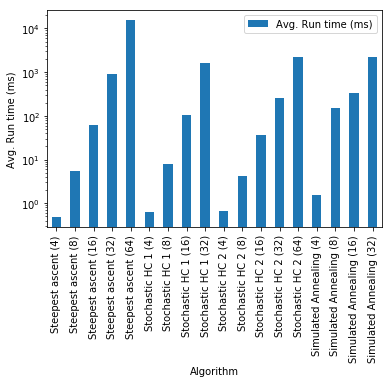

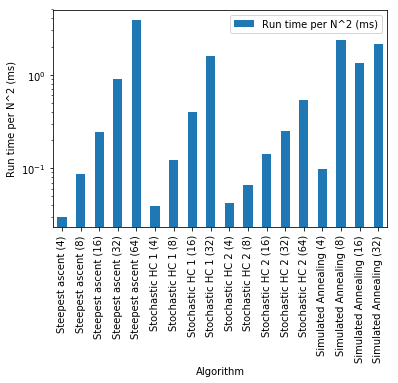

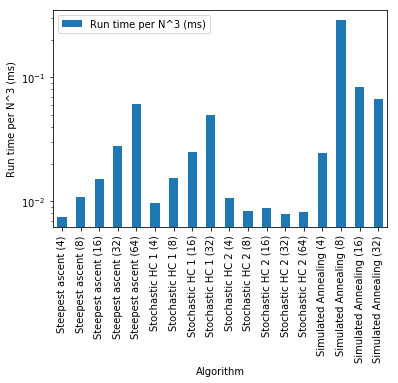

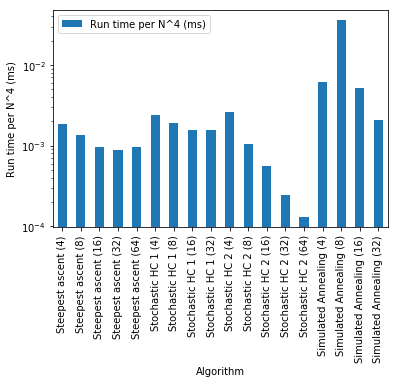

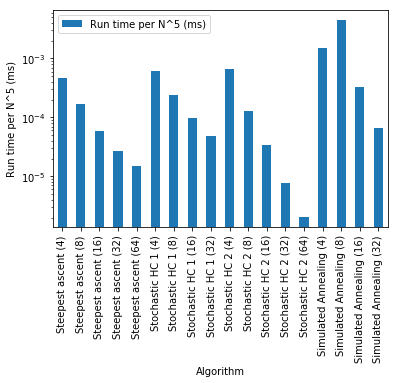

In [10]:
import matplotlib.pyplot as plt

result_data_frame["Avg. Run time (ms)"] = result_data_frame["Avg. Run time (ms)"].astype(float)
result_data_frame["x"] = result_data_frame.index + " (" + result_data_frame["Board Size"].astype(str) + ")"

plot = result_data_frame.plot(x = "x", y = "Avg. Run time (ms)", kind="bar", logy=True)
plot.set(xlabel="Algorithm", ylabel="Avg. Run time (ms)")
plt.show(block=False)

result_data_frame["Run time per N^2 (ms)"] = result_data_frame["Avg. Run time (ms)"].astype(float) / (result_data_frame["Board Size"] ** 2)
plot = result_data_frame.plot(x = "x", y = "Run time per N^2 (ms)", kind="bar", logy=True)
plot.set(xlabel="Algorithm", ylabel="Run time per N^2 (ms)")
plt.show(block=False)

result_data_frame["Run time per N^3 (ms)"] = result_data_frame["Avg. Run time (ms)"].astype(float) / ((result_data_frame["Board Size"] ** 3))
plot = result_data_frame.plot(x = "x", y = "Run time per N^3 (ms)", kind="bar", logy=True)
plot.set(xlabel="Algorithm", ylabel="Run time per N^3 (ms)")
plt.show(block=False)

result_data_frame["Run time per N^4 (ms)"] = result_data_frame["Avg. Run time (ms)"].astype(float) / ((result_data_frame["Board Size"] ** 4))
plot = result_data_frame.plot(x = "x", y = "Run time per N^4 (ms)", kind="bar", logy=True)
plot.set(xlabel="Algorithm", ylabel="Run time per N^4 (ms)")
plt.show(block=False)

result_data_frame["Run time per N^5 (ms)"] = result_data_frame["Avg. Run time (ms)"].astype(float) / ((result_data_frame["Board Size"] ** 5))
plot = result_data_frame.plot(x = "x", y = "Run time per N^5 (ms)", kind="bar", logy=True)
plot.set(xlabel="Algorithm", ylabel="Run time per N^5 (ms)")
plt.show(block=False)

**Given that N × N is the board dimensions, this experiment suggests that:**

* **Steepest ascent and stochastic hill climbing #1 has a theoretical upper bound of $O(N^4)$ ($O(N^2)$ to get an improvement times $O(N^2)$ improvements). In practice, it appears to confirm the $O(N^4)$ complexity.**
* **Stochastic hill climbing #2 has a theoretical upper bound of $O(N^5)$ ($O(N^3)$ to get an improvement times $O(N^2)$ improvements), but in practice typically attains a complexity between $O(N^2)$ and $O(N^3)$.**
* **The complexity of simulated annealing depends on the final value of $t$ and not directly on $N$, and thus theoretically could be unbounded in the case of an unrestricted too rapid cooling. Experimentally, this appears to be roughly on the order of $O(N^3)$.**

***(Note that while all of these are horribly inefficient compared to the actual complexity of the N-queens problem, the explicit solution of the N-queens problem cannot be generalized.)***

**If we require N must be a power of two and define reasonable time as an average runtime below 1 second on my machine, then:**

* **Steepest ascent can solve 32 × 32**
* **Stochastic hill climbing #1 can solve 16 × 16 (this is slower because it regenerates the list of successors multiple times)**
* **Stochastic hill climbing #2 can solve 128 × 128**
* **Simulated annealing can solve 16 × 16 (this is slower because it always finds optimal solutions)**

**It is worth noting that the correctness of the solutions of each varies, e.g. stochastic hill climbing #2 will is stuck in local optima 100% of the time in the 128x128 board.**

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time 

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [11]:
# Code and description go here
def column_swap(board, i, j):
    # type: (Board, int, int) -> Board
    """Return a copy of board such that board[i] and board[j] are switched"""
    safe_board = board.copy()
    safe_board[i], safe_board[j] = safe_board[j], safe_board[i]
    return safe_board

import random
def get_successor_double(board):
    # type: (Board) -> Board
    """Randomly generate a board with 1-2 columns changed"""
    n_rand = len(board) - 1
    c1 = random.randint(0, n_rand)
    p1 = random_except(0, n_rand, board[c1])
    c2 = random.randint(0, n_rand)
    p2 = random_except(0, n_rand, board[c2])

    first = board_successor(board, c1, p1)
    return board_successor(first, c2, p2) if c1 != c2 else first

def get_successor_switch(board):
    # type: (Board) -> Board
    """Randomly generate a board with a pair of columns switched"""
    n_rand = len(board) - 1
    c1 = random.randint(0, n_rand)
    c2 = random_except(0, n_rand, c1)
    return column_swap(board, c1, c2)

def get_successor_selector(board, column_edit_max, total_max, double_edit_flag):
    # type: (Board, bool, bool, bool) -> Board
    """Get a successor based on the input criteria"""

    # There are n * (n - 1) single column edits
    # There are n * (n - 1) column switches
    # There are n * (n - 1) * (n - 1) * (n - 1) double column edits
    # To be fair, weight them against the number that are possible
    chosen = random.randint(0, total_max - 1)
    if (chosen < column_edit_max):
        return get_successor_double(board) if double_edit_flag else get_successor(board)
    return get_successor_switch(board)

def successor_generator(board_size, single_edit_enabled, column_switch_enabled, double_edit_enabled):
    # type: (int, bool, bool, bool) -> Callable[[Board], Board]
    """Generate the parameters known in advance for successor selector function"""

    n = board_size
    column_edit_max = 0
    total_max = 0
    if (double_edit_enabled):
        column_edit_max += n * ((n - 1) ** 3)
        total_max += n * ((n - 1) ** 3)
    elif (single_edit_enabled):
        column_edit_max += n * (n - 1)
        total_max += n * (n - 1)
    
    if (column_switch_enabled):
        total_max += n * (n - 1)
    
    # Disabling all possible successors is not a valid condition
    if (total_max == 0):
        return None
    
    return (lambda board : get_successor_selector(board, column_edit_max, total_max, double_edit_enabled), total_max)


stochastic2_local = lambda *args: ((lambda successor_selector, total_max : lambda board :
    (hill_climb(board, conflicts,
               lambda c : get_improvement3(c,
                                           conflicts,
                                           successor_selector,
                                           2 * total_max))))(*successor_generator(*args)))

In [12]:
from IPython.display import display, HTML
from collections import OrderedDict
from concurrent.futures import ProcessPoolExecutor

local_agents = [("Only one square", stochastic2_local(8, True, False, False)),
                ("Switching two columns", stochastic2_local(8, False, True, False)),
                ("Only one square or switching two columns", stochastic2_local(8, True, True, False)),
                ("Two squares", stochastic2_local(8, False, False, True)),
                ("Two squares or switching two columns", stochastic2_local(8, False, True, True)),
                ]
local_result_data_frame = pd.DataFrame()

N = 100
for name, func in local_agents:
    average_ms = 0
    board_size = 8

    if True:
        def parallel_iteration(_):
            return iteration(func, board_size)
        
        with ProcessPoolExecutor() as pool:
            parallel = pool.map(parallel_iteration, range(N))
        t, num_conflicts, num_perfect = tuple_sum(*parallel)
        average_ms = t / N * 1000
        avg_conflicts = num_conflicts / N
        percent_perfect = num_perfect / N * 100
        values = (board_size, "%.3f" % average_ms, "%.3f" % avg_conflicts, "%.1f" % percent_perfect)

        # Add row to data frame
        frame = pd.DataFrame([OrderedDict(zip(columns, values))], index=[name])
        local_result_data_frame = pd.concat([local_result_data_frame, frame])

display(HTML(local_result_data_frame.to_html()))

,Board Size,Avg. Run time (ms),Avg. Conflicts,% of runs ending in optimal solution
Only one square,8,4.097,1.580,6.0
Switching two columns,8,3.194,4.720,0.0
Only one square or switching two columns,8,7.058,1.380,9.0
Two squares,8,160.965,0.630,40.0
Two squares or switching two columns,8,163.116,0.620,42.0


**Adding more types of local moves increases both runtime and the optimality of the board solutions, but does not prevent being stuck in local minima entirely.**

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [13]:
# Code and description go here